<a href="https://colab.research.google.com/github/sahils2607/COVID-Detection-in-CT-Scans/blob/main/Copy_of_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports Required**

In [ ]:
import os
import PIL
import random
import copy
import math
from PIL import Image
import shutil
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import cv2

In [ ]:
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.datasets.folder import default_loader
from torchsummary import summary

In [ ]:
pip install torch-lr-finder

In [ ]:
from torch_lr_finder import LRFinder

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# **Preparing the Data**

In [ ]:
root_dir="/content/drive/MyDrive/archive"
positive_cases_path=os.path.join("/content/drive/MyDrive/archive/CT_COVID/")
negative_cases_path=os.path.join("/content/drive/MyDrive/archive/CT_NonCOVID/")

In [ ]:
positive_images=glob(os.path.join(positive_cases_path,'*.png'))
positive_images.extend(glob(os.path.join(positive_cases_path,"*.jpg")))
negative_images=glob(os.path.join(negative_cases_path,'*.png'))
negative_images.extend(glob(os.path.join(negative_cases_path,"*.jpg")))

In [ ]:
print('Number of positive Images :',len(positive_images))
print('Number of negative Images : ',len(negative_images))

Number of positive Images : 349
Number of negative Images :  397


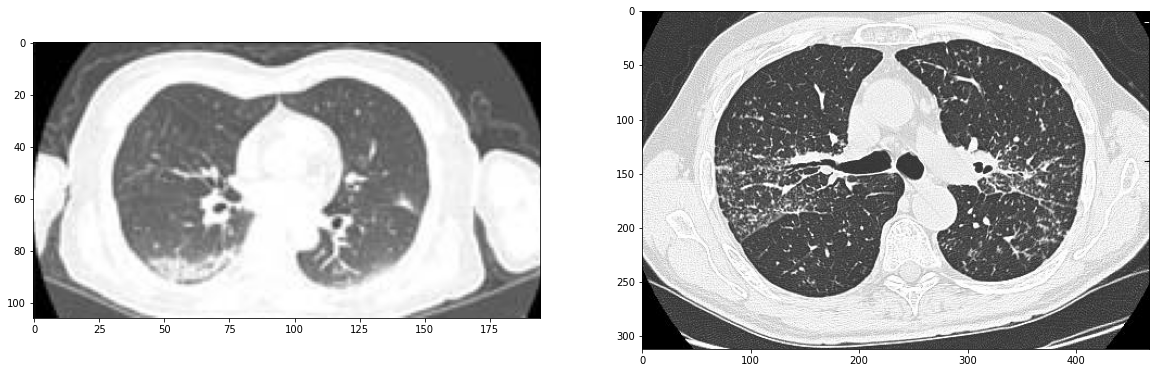

In [ ]:
image_sample_pos=PIL.Image.open(positive_images[73])
image_sample_neg=PIL.Image.open(negative_images[145])

pic=plt.figure(figsize=(20,20))
pic.add_subplot(1,2,1)
plt.imshow(image_sample_pos)
pic.add_subplot(1,2,2)
plt.imshow(image_sample_neg)

In [ ]:
covid={'class':'Covid',
       'images':positive_images}
noncovid={'class':'NonCovid',
'images':negative_images
}
## /content/drive/MyDrive

In [ ]:
subdirs=['/content/drive/MyDrive/train/','/content/drive/MyDrive/cval/','/content/drive/MyDrive/test/']
for subdir in subdirs:
  labeldirs=['Covid/','NonCovid/']
  for labeldir in labeldirs:
     newdir = subdir + labeldir
     os.makedirs(newdir, exist_ok=True)

In [ ]:
list1=list(range(0,len(positive_images)))
list2=list(range(0,len(negative_images)))
random.seed(59)
random.shuffle(list1)
random.seed(77)
random.shuffle(list2)

for group in [covid,noncovid]:
  frc=0.1
  number1=int(0.1*len(group['images']))
  listc=list2
  if group==covid:
    listc=list1
  print(listc)
  lenimages=len(listc)
  for x in range(number1):
    shutil.copy2(group['images'][listc[x]],'/content/drive/MyDrive/cval/'+group['class'])
  for x in range(number1,2*number1):
    shutil.copy2(group['images'][listc[x]],'/content/drive/MyDrive/test/'+group['class'])
  for x in range(2*number1,lenimages):
    shutil.copy2(group['images'][listc[x]],'/content/drive/MyDrive/train/'+group['class'])

[117, 208, 87, 314, 95, 149, 179, 268, 325, 286, 340, 308, 222, 342, 273, 300, 17, 132, 32, 206, 346, 177, 12, 292, 279, 317, 253, 55, 110, 343, 118, 28, 266, 194, 135, 327, 92, 252, 167, 312, 243, 36, 283, 138, 19, 187, 112, 116, 348, 128, 332, 220, 49, 213, 247, 215, 205, 113, 1, 127, 191, 238, 39, 108, 70, 96, 240, 140, 141, 302, 276, 198, 294, 184, 311, 324, 9, 131, 50, 267, 278, 210, 330, 244, 68, 225, 94, 169, 143, 57, 103, 62, 10, 295, 229, 21, 175, 305, 218, 18, 192, 84, 48, 71, 228, 316, 83, 320, 272, 139, 100, 336, 15, 281, 164, 14, 147, 168, 77, 212, 217, 97, 35, 86, 203, 201, 33, 339, 151, 120, 221, 265, 102, 200, 101, 255, 99, 199, 233, 216, 53, 72, 345, 171, 67, 3, 163, 137, 145, 133, 236, 40, 178, 121, 134, 315, 106, 89, 239, 46, 111, 52, 195, 224, 170, 125, 291, 196, 261, 256, 290, 148, 257, 162, 122, 319, 61, 301, 78, 142, 154, 250, 309, 157, 347, 165, 242, 26, 37, 263, 304, 158, 64, 34, 73, 297, 219, 63, 4, 227, 182, 337, 180, 146, 185, 0, 105, 211, 107, 307, 176, 249

In [ ]:
print('Positive Images in Cross Validation Set :',(len(os.listdir('/content/drive/MyDrive/cval/Covid'))))
print('Negative Images in Cross Validation Set :',(len(os.listdir('/content/drive/MyDrive/cval/NonCovid'))))
print('Positive Images in Test Set :',(len(os.listdir('/content/drive/MyDrive/test/Covid'))))
print('Negative Images in Test Set :',(len(os.listdir('/content/drive/MyDrive/test/NonCovid'))))
print('Positive Images in Train Set :',(len(os.listdir('/content/drive/MyDrive/train/Covid'))))
print('Negative Images in Train Set :',(len(os.listdir('/content/drive/MyDrive/train/NonCovid'))))

Positive Images in Cross Validation Set : 34
Negative Images in Cross Validation Set : 39
Positive Images in Test Set : 34
Negative Images in Test Set : 39
Positive Images in Train Set : 281
Negative Images in Train Set : 319


# **Building the Datasets and Databuilders**

In [ ]:
def CLAHE_transform(image_path):
  bgr = cv2.imread(image_path)
  lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
  lab_planes = cv2.split(lab)
  clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
  lab_planes[0] = clahe.apply(lab_planes[0])
  lab = cv2.merge(lab_planes)
  bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
  return bgr


In [ ]:
def imshow(r,images):
  fig,axes=plt.subplots(r,2,figsize=(10,10))
  list1=list(range(0,len(images)))
  cols=['Before CLAHE','After CLAHE']
  random.shuffle(list1)
  n=0
  for ax, col in zip(axes[0], cols):
    ax.set_title(col,size='large')
  for i in range(r):
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])
    axes[i, 0].imshow(PIL.Image.open(images[list1[n]]))
    axes[i, 1].set_xticks([])
    axes[i, 1].set_yticks([])
    im_pil = Image.fromarray(CLAHE_transform(images[list1[n]]))
    axes[i,1].imshow(im_pil)
    n += 1


Some Positive Images


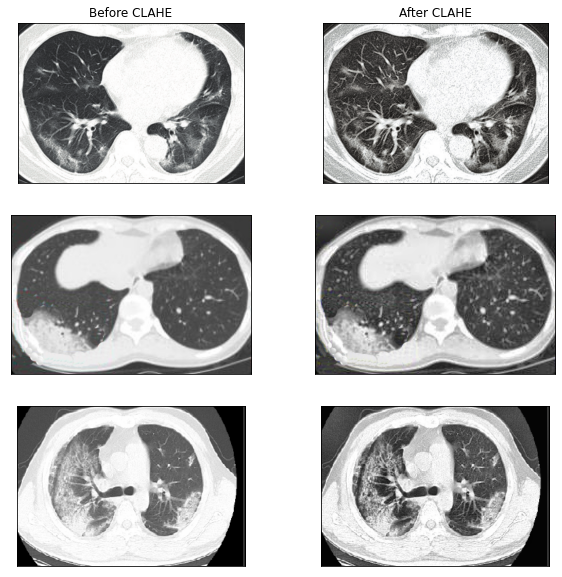

In [ ]:
print('Some Positive Images')
imshow(3,positive_images)

Some Negative Images


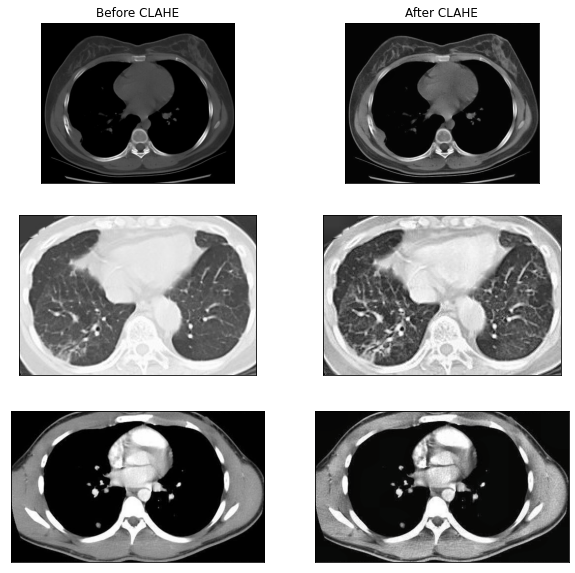

In [ ]:
print('Some Negative Images')
imshow(3,negative_images)

**With Clip Limit 3.0**

Some Positive Images


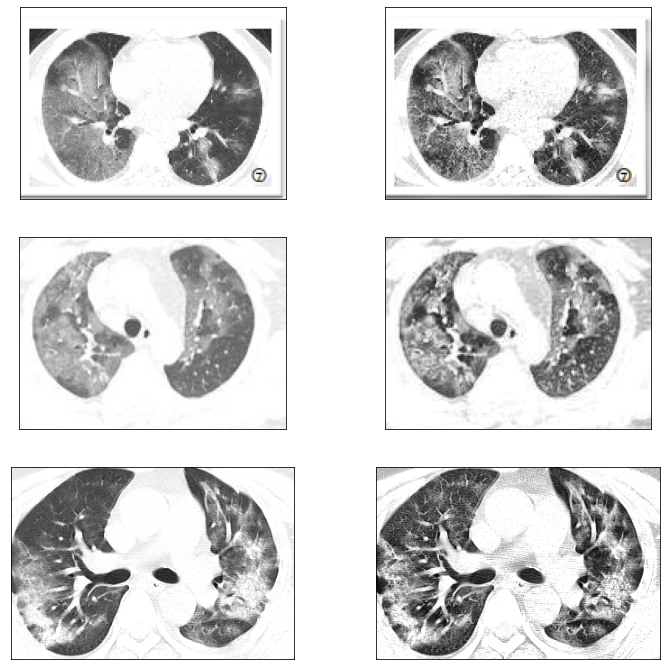

In [ ]:

print('Some Positive Images')
imshow(3,positive_images)

Some Negative Images


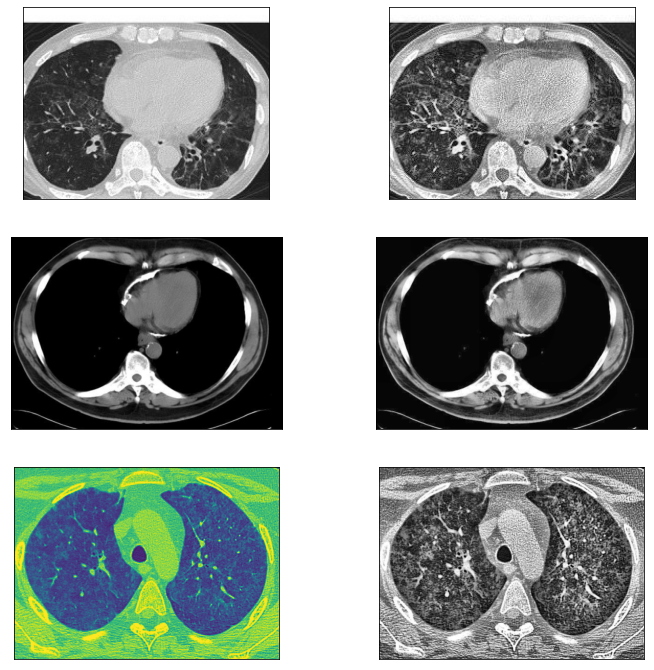

In [ ]:
print('Some Negative Images')
imshow(3,negative_images)

In [ ]:
transforms_basic = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(degrees=10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [ ]:
class DatasetBuilder(datasets.ImageFolder):
  def __init__(self,root,loader=default_loader,is_valid_file=None,transform=None):
    super(DatasetBuilder, self).__init__(root=root, loader=loader, is_valid_file=is_valid_file,transform=transform)
  def __getitem__(self,index):
    image_path,target=self.samples[index]
    bgr = CLAHE_transform(image_path)
    sample = torchvision.transforms.ToTensor()(bgr)
    sample=torchvision.transforms.ToPILImage()(sample)
    if self.transform:
      sample=self.transform(sample)
    return sample,target

In [ ]:
train_dataset=DatasetBuilder(root='/content/drive/MyDrive/train/',transform=transforms_basic)
train_dataloader=DataLoader(train_dataset,batch_size=25,shuffle=True)
cross_validation_dataset=DatasetBuilder(root='/content/drive/MyDrive/cval/',transform=transforms_basic)
cval_dataloader=DataLoader(cross_validation_dataset,batch_size=25,shuffle=True)

In [ ]:
#A simple python function to count number of items in each category
def bincounter(arr):
  z=[0,0]
  for x in arr:
    z[x]+=1;
  return z

In [ ]:
print(bincounter(cross_validation_dataset.targets))

[34, 39]


In [ ]:
print(bincounter(train_dataset.targets))

[281, 319]


In [ ]:
def get_number_correct(prediction,labels,device):
  return prediction.to(device).argmax(dim=1).eq(labels.to(device)).sum().item()





# **Function for Training**



In [ ]:
##Member Function to train a Network on the Dataset
def trainer(train_dataset,cross_validation_dataset,optimizer,num_epochs,model,checkpoint_path_models,device,scheduler):
  evaluater=[]
  min_val_loss=1e18 # to track minimum cross validation loss for purpose of early stopping
  epochs_no_improve=0 # To track number of epochs for which no improvement is made
  model.to(device)
  threshold_epochs=10
 ### checkpoint_path_models='model_resnet16.pth'

  for epoch in range(num_epochs):
    print('Epoch {} starts........'.format(epoch))
    total_train_loss_epoch=0
    total_crossval_loss_epoch=0
    total_correct_epoch=0
    total_correct_epoch_train=0
    train_dataloader=DataLoader(train_dataset,batch_size=25,shuffle=True)
    cval_dataloader=DataLoader(cross_validation_dataset,batch_size=25,shuffle=True)
    z1=0 # Total Number of training samples tracker
    z2=0 # Total Number of Cross val samples tracker
    for images,labels in iter(train_dataloader):
      images=images.to(device)
      labels=labels.to(device)
      z1+=len(labels)
      optimizer.zero_grad()
      out=model(images)
      loss=F.cross_entropy(out,labels)
      
      loss.backward()
      optimizer.step()
      
      total_train_loss_epoch+=loss.item()*train_dataloader.batch_size
      total_correct_epoch_train+=get_number_correct(out,labels,device)

    for samples,tags in iter(cval_dataloader):
      model.eval()
      with torch.no_grad():
        samples=samples.to(device)
        tags=tags.to(device)
        z2+=len(tags)
        preds=model(samples)
        cval_loss=F.cross_entropy(preds,tags)
        total_crossval_loss_epoch+=cval_loss.item()*cval_dataloader.batch_size

        total_correct_epoch+=get_number_correct(preds,tags,device)
    
    total_train_loss_epoch/=len(train_dataset)
    total_crossval_loss_epoch/=len(cross_validation_dataset)

    #Check for Early Stopping or Saving the model
    if total_crossval_loss_epoch<min_val_loss and epoch>0:
      #Save the model
      torch.save(model.state_dict(),checkpoint_path_models)
      print("Model saved at Epoch Number {}".format(epoch))
      epochs_no_improve=0
      min_val_loss=total_crossval_loss_epoch
    else:
      epochs_no_improve+=1
      if epochs_no_improve==threshold_epochs:
        print('Early Stopping !', 'Epoch Number : {}'.format(epoch))
        #Load the Model
        ##model=torch.load(checkpoint_path_models) ##isko theek krna h abhi
    if scheduler is not 0:
      scheduler.step()
    print("Cross Validation Loss :  {} " .format(total_crossval_loss_epoch),"Cross Validation Accuracy : {} ".format(total_correct_epoch/z2))
    ###my_lr_scheduler.step()
    evaluater.append([epoch,total_train_loss_epoch,total_crossval_loss_epoch,total_correct_epoch_train/z1,total_correct_epoch/z2])
  # print(evaluater[epoch])
  df=pd.DataFrame(evaluater,columns=['Epoch','Training_loss','Validation_loss','Training_Accuracy','Validation_Accuracy'])
  return df


In [ ]:
def model_performance_plotter(df1):
  ax=plt.gca()
  df1.plot(kind='line',x='Epoch',y='Training_loss',ax=ax)
  df1.plot(kind='line',x='Epoch',y='Validation_loss',color='Red',ax=ax)
  plt.show()


  ax=plt.gca()
  df1.plot(kind='line',x='Epoch',y='Training_Accuracy',ax=ax)
  df1.plot(kind='line',x='Epoch',y='Validation_Accuracy',color='Red',ax=ax)
  plt.show()


# **Trying Different Models** 

## **Resnet18**

In [ ]:
model_resnet18_pretrained_untuned=torchvision.models.resnet18(pretrained=True)
for name,param in model_resnet18_pretrained_untuned.named_parameters():
  if("bn" not in name):
     param.requires_grad=False
model_resnet18_pretrained_untuned.to('cpu')

model_resnet18_pretrained_untuned.fc=nn.Sequential(
     nn.Linear(512, 64), 
     nn.ReLU(), 
     nn.Dropout(0.2),
     nn.Linear(64, 10),
     nn.ReLU(),
     nn.Dropout(0.2), 
     nn.Linear(10,2),                  
     nn.LogSoftmax(dim=1)
)
print(summary(model_resnet18_pretrained_untuned,(3,224,224),28,'cpu'))
## Here untrained model is created which can be copied later on according to need

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [28, 64, 112, 112]           9,408
       BatchNorm2d-2         [28, 64, 112, 112]             128
              ReLU-3         [28, 64, 112, 112]               0
         MaxPool2d-4           [28, 64, 56, 56]               0
            Conv2d-5           [28, 64, 56, 56]          36,864
       BatchNorm2d-6           [28, 64, 56, 56]             128
              ReLU-7           [28, 64, 56, 56]               0
            Conv2d-8           [28, 64, 56, 56]          36,864
       BatchNorm2d-9           [28, 64, 56, 56]             128
             ReLU-10           [28, 64, 56, 56]               0
       BasicBlock-11           [28, 64, 56, 56]               0
           Conv2d-12           [28, 64, 56, 56]          36,864
      BatchNorm2d-13           [28, 64, 56, 56]             128
             ReLU-14           [28, 64,

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.38E-02


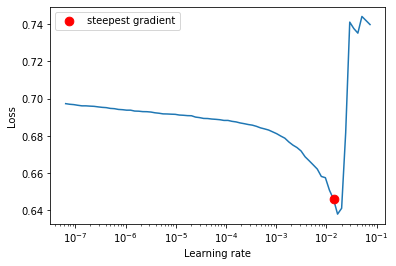

In [ ]:
model_1=copy.deepcopy(model_resnet18_pretrained_untuned)
criterion= nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=1e-8, weight_decay=1e-2)
lr_finder = LRFinder(model_1, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader, val_loader=cval_dataloader, end_lr=1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state


In [ ]:
optimizer=optim.Adam(model_1.parameters(),lr=0.001,weight_decay=0.01)
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'
print(device)
checkpoint_path='resnet18_before_finetune.pth'
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.75, last_epoch=-1, verbose=True)
df_resnet_before=trainer(train_dataset,cross_validation_dataset,optimizer,10,model_1,checkpoint_path,device,scheduler)
df_resnet_before

cuda
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 0 starts........
Adjusting learning rate of group 0 to 1.0000e-03.
Cross Validation Loss :  0.6584153191684043  Cross Validation Accuracy : 0.6301369863013698 
Epoch 1 starts........
Model saved at Epoch Number 1
Adjusting learning rate of group 0 to 1.0000e-03.
Cross Validation Loss :  0.5625048830901107  Cross Validation Accuracy : 0.726027397260274 
Epoch 2 starts........
Adjusting learning rate of group 0 to 1.0000e-03.
Cross Validation Loss :  0.5812183430750076  Cross Validation Accuracy : 0.6986301369863014 
Epoch 3 starts........
Model saved at Epoch Number 3
Adjusting learning rate of group 0 to 7.5000e-04.
Cross Validation Loss :  0.4918391267730765  Cross Validation Accuracy : 0.8082191780821918 
Epoch 4 starts........
Adjusting learning rate of group 0 to 7.5000e-04.
Cross Validation Loss :  0.5105794904983207  Cross Validation Accuracy : 0.7397260273972602 
Epoch 5 starts........
Model saved at Epoch Number 5
Adj

Epoch  Training_loss  ...  Training_Accuracy  Validation_Accuracy
0      0       0.686781  ...           0.610000             0.630137
1      1       0.594191  ...           0.690000             0.726027
2      2       0.515572  ...           0.750000             0.698630
3      3       0.459790  ...           0.776667             0.808219
4      4       0.392141  ...           0.820000             0.739726
5      5       0.363821  ...           0.833333             0.780822
6      6       0.321007  ...           0.866667             0.849315
7      7       0.275563  ...           0.880000             0.849315
8      8       0.274134  ...           0.885000             0.794521
9      9       0.252677  ...           0.888333             0.835616

[10 rows x 5 columns]

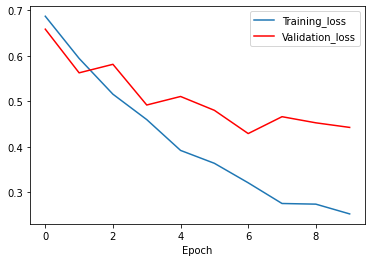

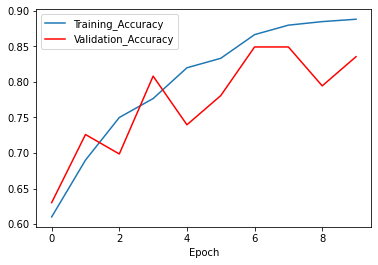

In [ ]:
model_performance_plotter(df_resnet_before)

In [ ]:
model_1.load_state_dict(torch.load('resnet18_before_finetune.pth'))
for param in model_1.parameters():
  if param.requires_grad==False:
      param.requires_grad=True
optimizer=optim.Adam(model_1.parameters(),lr=0.00005)
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'
checkpoint_path='resnet18_after_finetune.pth'
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.75, last_epoch=-1, verbose=True)
df2=trainer(train_dataset,cross_validation_dataset,optimizer,10,model_1,checkpoint_path,device,scheduler)
df2

Adjusting learning rate of group 0 to 5.0000e-05.
Epoch 0 starts........
Adjusting learning rate of group 0 to 5.0000e-05.
Cross Validation Loss :  0.5172308075101408  Cross Validation Accuracy : 0.8082191780821918 
Epoch 1 starts........
Model saved at Epoch Number 1
Adjusting learning rate of group 0 to 5.0000e-05.
Cross Validation Loss :  0.5683951590159168  Cross Validation Accuracy : 0.7671232876712328 
Epoch 2 starts........
Model saved at Epoch Number 2
Adjusting learning rate of group 0 to 5.0000e-05.
Cross Validation Loss :  0.45806432831777283  Cross Validation Accuracy : 0.8082191780821918 
Epoch 3 starts........
Model saved at Epoch Number 3
Adjusting learning rate of group 0 to 3.7500e-05.
Cross Validation Loss :  0.4346627486895209  Cross Validation Accuracy : 0.821917808219178 
Epoch 4 starts........
Model saved at Epoch Number 4
Adjusting learning rate of group 0 to 3.7500e-05.
Cross Validation Loss :  0.3839754486737186  Cross Validation Accuracy : 0.8767123287671232 


Epoch  Training_loss  ...  Training_Accuracy  Validation_Accuracy
0      0       0.571903  ...           0.728333             0.808219
1      1       0.322448  ...           0.875000             0.767123
2      2       0.261861  ...           0.891667             0.808219
3      3       0.230923  ...           0.890000             0.821918
4      4       0.163671  ...           0.940000             0.876712
5      5       0.091171  ...           0.975000             0.835616
6      6       0.067271  ...           0.978333             0.904110
7      7       0.062110  ...           0.981667             0.753425
8      8       0.092017  ...           0.970000             0.904110
9      9       0.040745  ...           0.988333             0.863014

[10 rows x 5 columns]

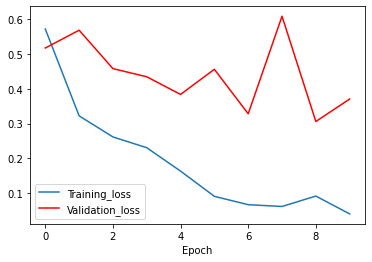

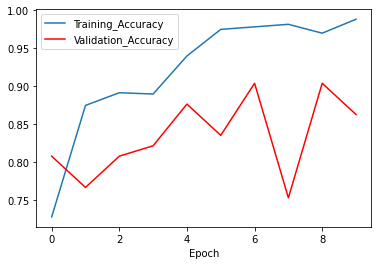

In [ ]:
model_performance_plotter(df2)

**Results**

In [ ]:
model_resnet18=torchvision.models.resnet18(pretrained=False)

model_resnet18.fc=nn.Sequential(
     nn.Linear(512, 64), 
     nn.ReLU(), 
     nn.Dropout(0.2),
     nn.Linear(64, 10),
     nn.ReLU(),
     nn.Dropout(0.2), 
     nn.Linear(10,2),                  
     nn.LogSoftmax(dim=1)
)
model_resnet18.load_state_dict(torch.load('/content/resnet18_after_finetune.pth'))

<All keys matched successfully>

In [ ]:
# Results on testset after finetuned
labels,predictions=testset_results(model_resnet18,test_dataset,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[31  3]
 [ 6 33]]
F1 score: 0.880000
Accuracy score: 0.876712
Precision Score: 0.9166666666666666
Recall:0.8461538461538461


In [ ]:
## Results on cross validation after fine tuning
labels,predictions=testset_results(model_resnet18,cross_validation_dataset,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[29  5]
 [ 2 37]]
F1 score: 0.913580
Accuracy score: 0.904110
Precision Score: 0.8809523809523809
Recall:0.9487179487179487


In [ ]:
model_resnet18.load_state_dict(torch.load('/content/resnet18_before_finetune.pth'))

<All keys matched successfully>

In [ ]:
#Results on test dataset before fine tuning
labels,predictions=testset_results(model_resnet18,test_dataset,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[27  7]
 [ 8 31]]
F1 score: 0.805195
Accuracy score: 0.794521
Precision Score: 0.8157894736842105
Recall:0.7948717948717948


## **VGG 121  new try**

In [ ]:
model_vgg_pretrained_untuned=torchvision.models.vgg16(pretrained=True)
for param in model_vgg_pretrained_untuned.parameters():
  param.requires_grad=False
model_vgg_pretrained_untuned.to('cpu')
print(summary(model_vgg_pretrained_untuned,(3,224,224),28,'cpu'))

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [28, 64, 224, 224]           1,792
              ReLU-2         [28, 64, 224, 224]               0
            Conv2d-3         [28, 64, 224, 224]          36,928
              ReLU-4         [28, 64, 224, 224]               0
         MaxPool2d-5         [28, 64, 112, 112]               0
            Conv2d-6        [28, 128, 112, 112]          73,856
              ReLU-7        [28, 128, 112, 112]               0
            Conv2d-8        [28, 128, 112, 112]         147,584
              ReLU-9        [28, 128, 112, 112]               0
        MaxPool2d-10          [28, 128, 56, 56]               0
           Conv2d-11          [28, 256, 56, 56]         295,168
             ReLU-12          [28, 256, 56, 56]               0
           Conv2d-13          [28, 256, 56, 56]         590,080
             ReLU-14          [28, 256

In [ ]:
model_vgg_pretrained_untuned.classifier = nn.Sequential(*[model_vgg_pretrained_untuned.classifier[i] for i in range(4)])
model_vgg_pretrained_untuned.classifier[3]=nn.Sequential(
    nn.Linear(4096,1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024,64),
    nn.ReLU(),
    nn.Dropout(.40),
    nn.Linear(64,2),
    nn.LogSoftmax(dim=1)
)

**Idhar se Training Start h vgg model ka(Aur uske baad fine tune by unfreezing layers) **

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.94E-03


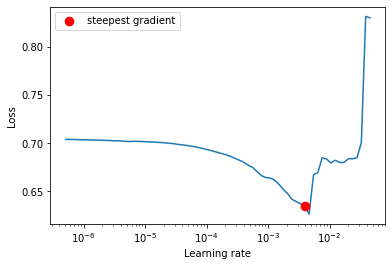

In [ ]:
model_vgg1=copy.deepcopy(model_vgg_pretrained_untuned)
criterion= nn.CrossEntropyLoss()
optimizer = optim.Adam(model_vgg1.parameters(), lr=1e-7, weight_decay=1e-1)
lr_finder = LRFinder(model_vgg1, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader, val_loader=cval_dataloader, end_lr=1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model 

In [ ]:
device='cpu'
if(torch.cuda.is_available()):
  device='cuda'

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 0 starts........
Adjusting learning rate of group 0 to 1.0000e-03.
Cross Validation Loss :  0.563337653875351  Cross Validation Accuracy : 0.6438356164383562 
Epoch 1 starts........
Model saved at Epoch Number 1
Adjusting learning rate of group 0 to 1.0000e-03.
Cross Validation Loss :  0.4226716107701602  Cross Validation Accuracy : 0.8082191780821918 
Epoch 2 starts........
Model saved at Epoch Number 2
Adjusting learning rate of group 0 to 1.0000e-03.
Cross Validation Loss :  0.39265442588557936  Cross Validation Accuracy : 0.8082191780821918 
Epoch 3 starts........
Adjusting learning rate of group 0 to 1.0000e-03.
Cross Validation Loss :  0.4719014241270823  Cross Validation Accuracy : 0.7808219178082192 
Epoch 4 starts........
Adjusting learning rate of group 0 to 8.0000e-04.
Cross Validation Loss :  0.4063680870075748  Cross Validation Accuracy : 0.8082191780821918 
Epoch 5 starts........
Model saved at Epoch Number 5
Adjusti

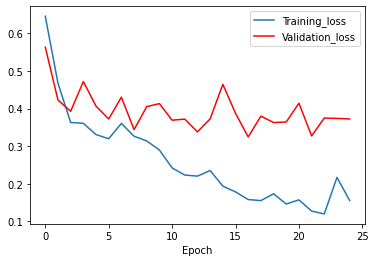

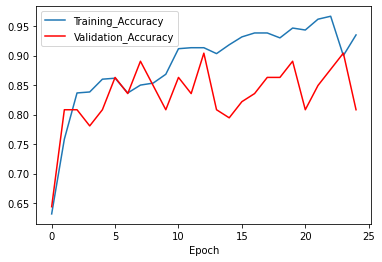

In [ ]:
model_vgg1=copy.deepcopy(model_vgg_pretrained_untuned)
optimizer=optim.Adam(model_vgg1.parameters(),lr=0.001,weight_decay=0.02)
checkpoint_path='vgg16_1n.pth'
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8, last_epoch=-1, verbose=True)
df_vgg1=trainer(train_dataset,cross_validation_dataset,optimizer,25,model_vgg1,checkpoint_path,device,scheduler)
model_performance_plotter(df_vgg1)

In [ ]:
model_vgg1=copy.deepcopy(model_vgg_pretrained_untuned)
model_vgg1.load_state_dict(torch.load(checkpoint_path))
optimizer=optim.Adam(model_vgg1.parameters(),lr=0.0006,weight_decay=0.1)
checkpoint_path11='vgg16_2n.pth'
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9, last_epoch=-1, verbose=True)
df_vgg11=trainer(train_dataset,cross_validation_dataset,optimizer,5,model_vgg1,checkpoint_path11,device,scheduler)


Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 0 starts........
Adjusting learning rate of group 0 to 6.0000e-04.
Cross Validation Loss :  0.46442244967369184  Cross Validation Accuracy : 0.7671232876712328 
Epoch 1 starts........
Model saved at Epoch Number 1
Adjusting learning rate of group 0 to 5.4000e-04.
Cross Validation Loss :  0.4355634626460402  Cross Validation Accuracy : 0.821917808219178 
Epoch 2 starts........
Model saved at Epoch Number 2
Adjusting learning rate of group 0 to 5.4000e-04.
Cross Validation Loss :  0.35026506201861657  Cross Validation Accuracy : 0.8356164383561644 
Epoch 3 starts........
Adjusting learning rate of group 0 to 4.8600e-04.
Cross Validation Loss :  0.4300103101828327  Cross Validation Accuracy : 0.8493150684931506 
Epoch 4 starts........
Model saved at Epoch Number 4
Adjusting learning rate of group 0 to 4.8600e-04.
Cross Validation Loss :  0.32966718179722354  Cross Validation Accuracy : 0.8493150684931506 


In [ ]:
model_vgg1.load_state_dict(torch.load(checkpoint_path))
for param in model_vgg1.parameters():
  if param.requires_grad==False:
      param.requires_grad=True


Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 0 starts........
Adjusting learning rate of group 0 to 1.0000e-05.
Cross Validation Loss :  0.39760671964246935  Cross Validation Accuracy : 0.7945205479452054 
Epoch 1 starts........
Model saved at Epoch Number 1
Adjusting learning rate of group 0 to 1.0000e-05.
Cross Validation Loss :  0.33392735744175844  Cross Validation Accuracy : 0.9041095890410958 
Epoch 2 starts........
Model saved at Epoch Number 2
Adjusting learning rate of group 0 to 8.0000e-06.
Cross Validation Loss :  0.3317837794757869  Cross Validation Accuracy : 0.863013698630137 
Epoch 3 starts........
Model saved at Epoch Number 3
Adjusting learning rate of group 0 to 8.0000e-06.
Cross Validation Loss :  0.2563403893823493  Cross Validation Accuracy : 0.9178082191780822 
Epoch 4 starts........
Adjusting learning rate of group 0 to 8.0000e-06.
Cross Validation Loss :  0.33236474615253814  Cross Validation Accuracy : 0.8767123287671232 
Epoch 5 starts........
Adjus

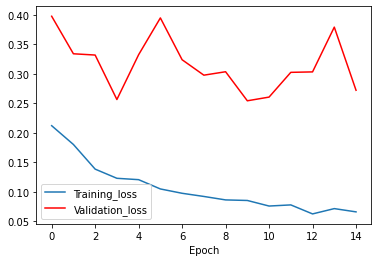

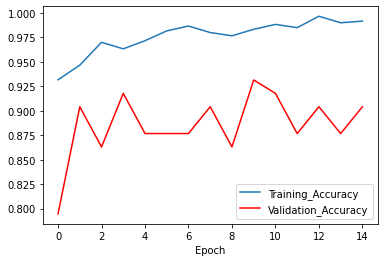

In [ ]:
model_vgg1.load_state_dict(torch.load(checkpoint_path11))
for param in model_vgg1.parameters():
  if param.requires_grad==False:
      param.requires_grad=True
optimizer=optim.Adam(model_vgg1.parameters(),lr=0.00001,weight_decay=0.3)
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.8, last_epoch=-1, verbose=True)
checkpoint_path2='vggfinal.pth'
df2=trainer(train_dataset,cross_validation_dataset,optimizer,15,model_vgg1,checkpoint_path2,device,scheduler)
model_performance_plotter(df2)

## **DenseNet 121**

In [ ]:
model_densenet_pretrained_untuned=torchvision.models.densenet121(pretrained=True)
for name,param in model_densenet_pretrained_untuned.named_parameters():
  if("norm" not in name):
     param.requires_grad=False
model_densenet_pretrained_untuned.to('cuda')

In [ ]:
model_densenet_pretrained_untuned.classifier=nn.Sequential(
    nn.Linear(1024,256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128,2),
    nn.LogSoftmax(dim=1)
)

In [ ]:
model_densenet_pretrained_untuned.to('cuda')

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
densenet_total_params = sum(p.numel() for p in model_densenet_pretrained_untuned.parameters())
print('Total number of Parameters in Densenet Network : {}'.format(densenet_total_params ))
densenet_total_params_train = sum(p.numel() for p in model_densenet_pretrained_untuned.parameters() if p.requires_grad)
print('Total number of Trainable Parameters in Densenet Network : {}'.format(densenet_total_params_train ))

Total number of Parameters in Densenet Network : 7249410
Total number of Trainable Parameters in Densenet Network : 379202


**Training Chalu Ab Densenet Ki**

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.48E-03


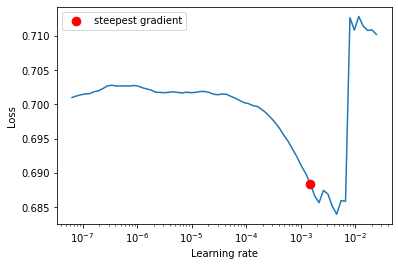

In [ ]:
model_dt1=copy.deepcopy(model_densenet_pretrained_untuned)
criterion= nn.CrossEntropyLoss()
optimizer = optim.Adam(model_dt1.parameters(), lr=1e-8, weight_decay=3e-2)
lr_finder = LRFinder(model_dt1, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader, val_loader=cval_dataloader, end_lr=1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model 

In [ ]:
device='cpu'
if(torch.cuda.is_available()):
  device='cuda'

Epoch 0 starts........
Model saved at Epoch Number 0
Cross Validation Loss :  0.6905174826922482  Cross Validation Accuracy : 0.6301369863013698 
Epoch 1 starts........
Model saved at Epoch Number 1
Cross Validation Loss :  0.5592200547864993  Cross Validation Accuracy : 0.7123287671232876 
Epoch 2 starts........
Model saved at Epoch Number 2
Cross Validation Loss :  0.5228256628121415  Cross Validation Accuracy : 0.7808219178082192 
Epoch 3 starts........
Cross Validation Loss :  0.6115097501506545  Cross Validation Accuracy : 0.6986301369863014 
Epoch 4 starts........
Cross Validation Loss :  0.5891297880100878  Cross Validation Accuracy : 0.7123287671232876 
Epoch 5 starts........
Model saved at Epoch Number 5
Cross Validation Loss :  0.4887091174517592  Cross Validation Accuracy : 0.7808219178082192 
Epoch 6 starts........
Cross Validation Loss :  0.5001504739669904  Cross Validation Accuracy : 0.7534246575342466 
Epoch 7 starts........
Model saved at Epoch Number 7
Cross Validatio

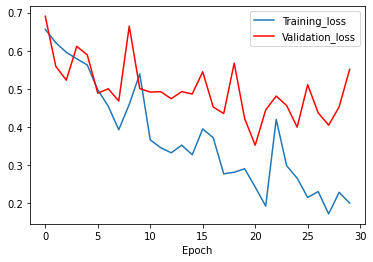

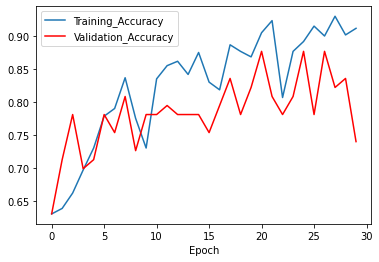

In [ ]:
model_dt1=copy.deepcopy(model_densenet_pretrained_untuned)
optimizer=optim.Adam(model_dt1.parameters(),lr=0.0012,weight_decay=0.01)
checkpoint_path='densenet121_1.pth'
df_dt1=trainer(train_dataset,cross_validation_dataset,optimizer,30,model_dt1,checkpoint_path,device)
model_performance_plotter(df_dt1)

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.85E-04


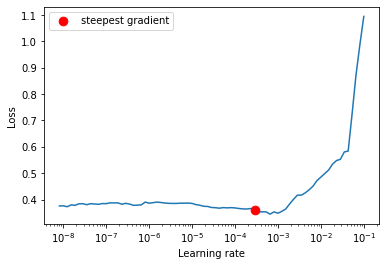

In [ ]:
model_dt1.load_state_dict(torch.load(checkpoint_path))
for param in model_dt1.parameters():
  if param.requires_grad==False:
      param.requires_grad=True
criterion= nn.CrossEntropyLoss()
optimizer = optim.Adam(model_dt1.parameters(), lr=1e-9, weight_decay=2e-2)
lr_finder = LRFinder(model_dt1, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader, end_lr=1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Epoch 0 starts........
Model saved at Epoch Number 0
Cross Validation Loss :  0.4432567382512027  Cross Validation Accuracy : 0.821917808219178 
Epoch 1 starts........
Model saved at Epoch Number 1
Cross Validation Loss :  0.40141085086211764  Cross Validation Accuracy : 0.8493150684931506 
Epoch 2 starts........
Model saved at Epoch Number 2
Cross Validation Loss :  0.3444733991198344  Cross Validation Accuracy : 0.8767123287671232 
Epoch 3 starts........
Cross Validation Loss :  0.5264126682934696  Cross Validation Accuracy : 0.7945205479452054 
Epoch 4 starts........
Model saved at Epoch Number 4
Cross Validation Loss :  0.3218854790272778  Cross Validation Accuracy : 0.863013698630137 
Epoch 5 starts........
Cross Validation Loss :  0.5843379675117257  Cross Validation Accuracy : 0.7945205479452054 
Epoch 6 starts........
Cross Validation Loss :  0.4685449681869925  Cross Validation Accuracy : 0.7808219178082192 
Epoch 7 starts........
Cross Validation Loss :  0.4108601568700516  C

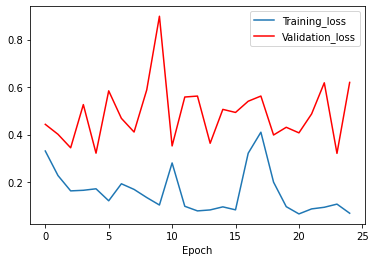

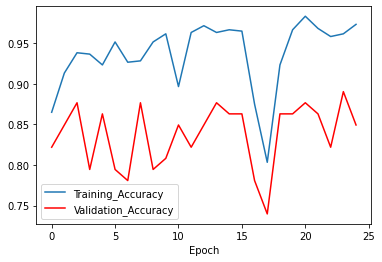

In [ ]:
model_dt1.load_state_dict(torch.load('/content/densenet121_1.pth'))
for param in model_dt1.parameters():
  if param.requires_grad==False:
      param.requires_grad=True
optimizer=optim.Adam(model_dt1.parameters(),lr=0.0001,weight_decay=0.01)
checkpoint_path='densenet121_2.pth'
df_dt1=trainer(train_dataset,cross_validation_dataset,optimizer,25,model_dt1,checkpoint_path,device)
model_performance_plotter(df_dt1)

## **Inception V3**

In [ ]:
model_inception_pretrained_untuned=torchvision.models.inception_v3(pretrained=True,aux_logits=False)
for name,param in model_inception_pretrained_untuned.named_parameters():
  if("bn" not in name):
     param.requires_grad=False
model_inception_pretrained_untuned.to('cpu')
print(summary(model_inception_pretrained_untuned,(3,299,299),28,'cpu'))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [28, 32, 149, 149]             864
       BatchNorm2d-2         [28, 32, 149, 149]              64
       BasicConv2d-3         [28, 32, 149, 149]               0
            Conv2d-4         [28, 32, 147, 147]           9,216
       BatchNorm2d-5         [28, 32, 147, 147]              64
       BasicConv2d-6         [28, 32, 147, 147]               0
            Conv2d-7         [28, 64, 147, 147]          18,432
       BatchNorm2d-8         [28, 64, 147, 147]             128
       BasicConv2d-9         [28, 64, 147, 147]               0
        MaxPool2d-10           [28, 64, 73, 73]               0
           Conv2d-11           [28, 80, 73, 73]           5,120
      BatchNorm2d-12           [28, 80, 73, 73]             160
      BasicConv2d-13           [28, 80, 73, 73]               0
           Conv2d-14          [28, 192,

In [ ]:
model_inception_pretrained_untuned.fc=nn.Sequential(
    nn.Linear(2048,512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512,10),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(10,2),
    nn.LogSoftmax(dim=1)
)

In [ ]:
train_dataset_2=DatasetBuilder(root='/content/drive/MyDrive/train/',transform=transforms_basic_2)
cross_validation_dataset_2=DatasetBuilder(root='/content/drive/MyDrive/cval/',transform=transforms_basic_2)
train_dataloader_2=DataLoader(train_dataset_2,batch_size=25,shuffle=True)
cval_dataloader_2=DataLoader(cross_validation_dataset,batch_size=25,shuffle=True)

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.32E-04


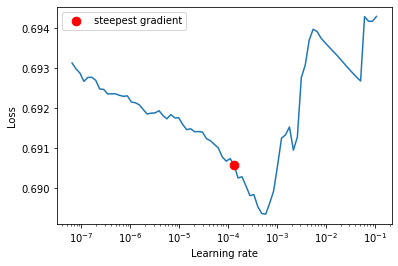

In [ ]:
model_incep1=copy.deepcopy(model_inception_pretrained_untuned)
criterion= nn.CrossEntropyLoss()
optimizer = optim.Adam(model_incep1.parameters(), lr=1e-8, weight_decay=1e-2)
lr_finder = LRFinder(model_incep1, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader_2, val_loader=cval_dataloader_2, end_lr=1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model 

Epoch 0 starts........
Model saved at Epoch Number 0
Cross Validation Loss :  0.6731843091037175  Cross Validation Accuracy : 0.6301369863013698 
Epoch 1 starts........
Model saved at Epoch Number 1
Cross Validation Loss :  0.6453454086225326  Cross Validation Accuracy : 0.684931506849315 
Epoch 2 starts........
Model saved at Epoch Number 2
Cross Validation Loss :  0.6039154652046831  Cross Validation Accuracy : 0.726027397260274 
Epoch 3 starts........
Model saved at Epoch Number 3
Cross Validation Loss :  0.5522629986070606  Cross Validation Accuracy : 0.7397260273972602 
Epoch 4 starts........
Model saved at Epoch Number 4
Cross Validation Loss :  0.5076296219270523  Cross Validation Accuracy : 0.7945205479452054 
Epoch 5 starts........
Model saved at Epoch Number 5
Cross Validation Loss :  0.4740414962376634  Cross Validation Accuracy : 0.7671232876712328 
Epoch 6 starts........
Cross Validation Loss :  0.4742472853562603  Cross Validation Accuracy : 0.7945205479452054 
Epoch 7 st

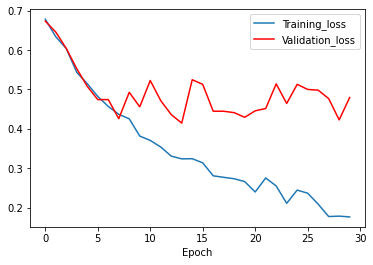

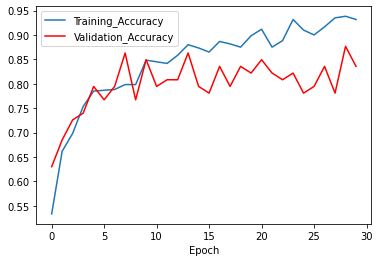

In [ ]:
optimizer=optim.Adam(model_incep1.parameters(),lr=0.00015,weight_decay=0.01)
checkpoint_path='inceptionv3_1.pth'
df1=trainer(train_dataset_2,cross_validation_dataset_2,optimizer,30,model_incep1,checkpoint_path,device)
model_performance_plotter(df1)

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.52E-07


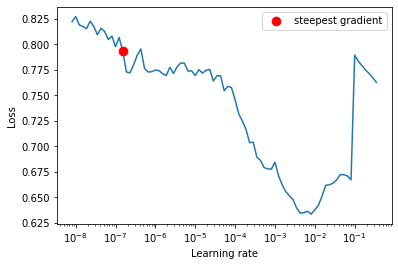

In [ ]:
model_incep1.load_state_dict(torch.load(checkpoint_path))
for param in model_incep1.parameters():
  if param.requires_grad==False:
      param.requires_grad=True
criterion= nn.CrossEntropyLoss()
optimizer = optim.Adam(model_incep1.parameters(), lr=1e-9, weight_decay=1e-2)
lr_finder = LRFinder(model_incep1, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader_2, end_lr=1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Epoch 0 starts........
Model saved at Epoch Number 0
Cross Validation Loss :  0.46779324542986206  Cross Validation Accuracy : 0.7945205479452054 
Epoch 1 starts........
Model saved at Epoch Number 1
Cross Validation Loss :  0.3683644410682051  Cross Validation Accuracy : 0.863013698630137 
Epoch 2 starts........
Cross Validation Loss :  0.3994072340939143  Cross Validation Accuracy : 0.8082191780821918 
Epoch 3 starts........
Cross Validation Loss :  0.3987850902015216  Cross Validation Accuracy : 0.8767123287671232 
Epoch 4 starts........
Cross Validation Loss :  0.4103161802847091  Cross Validation Accuracy : 0.8493150684931506 
Epoch 5 starts........
Cross Validation Loss :  0.37872108490499734  Cross Validation Accuracy : 0.8356164383561644 
Epoch 6 starts........
Cross Validation Loss :  0.5050367178165749  Cross Validation Accuracy : 0.8356164383561644 
Epoch 7 starts........
Model saved at Epoch Number 7
Cross Validation Loss :  0.3168159202761846  Cross Validation Accuracy : 0

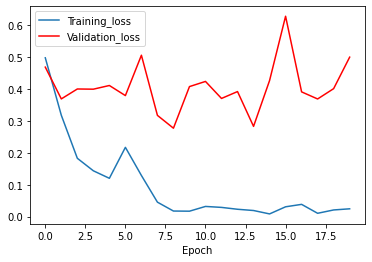

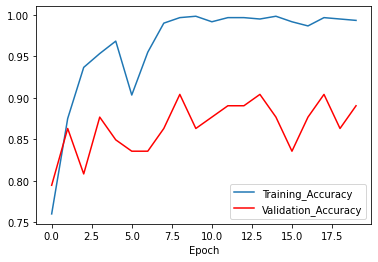

In [ ]:
model_incep1.load_state_dict(torch.load('inceptionv3_1.pth'))
for param in model_incep1.parameters():
  if param.requires_grad==False:
      param.requires_grad=True
optimizer=optim.Adam(model_incep1.parameters(),lr=0.00002,weight_decay=0.02)
checkpoint_path='inceptionv3_2.pth'
df_dt1=trainer(train_dataset_2,cross_validation_dataset_2,optimizer,20,model_incep1,checkpoint_path,device)
model_performance_plotter(df_dt1)

# **Results On Test Set**

In [ ]:
# A python function to get results on test set
def testset_results(model,test_dataset,device):
  model.to(device)
  model.eval()
  test_dataloader=DataLoader(test_dataset,batch_size=5,shuffle=False)
  actuals = []
  predictions = []
  with torch.no_grad():
        for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
  return [i.item() for i in actuals], [i.item() for i in predictions]

In [ ]:
def test_class_probabilities(model, device, test_loader):
    model.to(device)
    test_dataloader=DataLoader(test_dataset,batch_size=5,shuffle=False)
    model.eval()
    actuals = []
    probabilities = []
    with torch.no_grad():
        for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction)==0)
            probabilities.extend(np.exp(output[:,0]))
    return [i.item() for i in actuals], [i.item() for i in probabilities]

In [ ]:
transforms_basic_1 = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
## For inception Network
transforms_basic_11 = transforms.Compose([
        transforms.Resize((299,299)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
test_dataset=DatasetBuilder(root='/content/drive/MyDrive/test/',transform=transforms_basic_1)
test_dataset_1=DatasetBuilder(root='/content/drive/MyDrive/test/',transform=transforms_basic_11)

##**Resnet 18 model**

In [ ]:
model_resnet18=torchvision.models.resnet18(pretrained=False)
model_resnet18.fc=nn.Sequential(
     nn.Linear(512, 256), 
     nn.ReLU(), 
     nn.Dropout(0.4),
     nn.Linear(256, 2),                   
     nn.LogSoftmax(dim=1)
)
device='cuda'
model_resnet18.load_state_dict(torch.load('/content/drive/MyDrive/project_covid_small_results/resnet16_CLAHE_lrfinderwala_afterfinetune_89.pth'))


<All keys matched successfully>

In [ ]:
cross_validation_dataset

In [ ]:
model_resnet18.load_state_dict(torch.load('/content/drive/MyDrive/project_covid_small_results/resnet16_CLAHE_lrfinderwala_afterfinetune_89.pth'))

<All keys matched successfully>

In [ ]:
# Results on testset after finetuned
labels,predictions=testset_results(model_resnet18,test_dataset,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[29  5]
 [ 3 36]]
F1 score: 0.900000
Accuracy score: 0.890411
Precision Score: 0.8780487804878049
Recall:0.9230769230769231


In [ ]:
## Results on cross validation after fine tuning
labels,predictions=testset_results(model_resnet18,cross_validation_dataset,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[28  6]
 [ 2 37]]
F1 score: 0.902439
Accuracy score: 0.890411
Precision Score: 0.8604651162790697
Recall:0.9487179487179487


In [ ]:
#Results on test dataset before fine tuning
labels,predictions=testset_results(model_resnet18,test_dataset,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[29  5]
 [ 3 36]]
F1 score: 0.900000
Accuracy score: 0.890411
Precision Score: 0.8780487804878049
Recall:0.9230769230769231


In [ ]:
#Results on cross dataset before fine tuning
labels,predictions=testset_results(model_resnet18,cross_validation_dataset,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[28  6]
 [ 1 38]]
F1 score: 0.915663
Accuracy score: 0.904110
Precision Score: 0.8636363636363636
Recall:0.9743589743589743


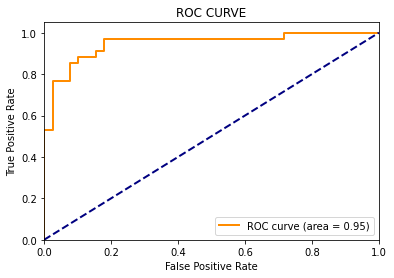

In [ ]:
device='cpu'
actuals, class_probabilities = test_class_probabilities(model_resnet18, device, test_dataset)

fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE' )
plt.legend(loc="lower right")
plt.show()

## **VGG 121**

In [ ]:
model_vgg121=torchvision.models.vgg16(pretrained=False)
model_vgg121.classifier = nn.Sequential(*[model_vgg121.classifier[i] for i in range(4)])
model_vgg121.classifier[3]=nn.Sequential(
    nn.Linear(4096,1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024,64),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(64,2),
    nn.LogSoftmax(dim=1)
)
model_vgg121.load_state_dict(torch.load('/content/drive/MyDrive/project_covid_small_results/vggfinal.pth'))

<All keys matched successfully>

In [ ]:
#Results on test after fine tuning
labels,predictions=testset_results(model_vgg121,test_dataset,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[29  5]
 [ 3 36]]
F1 score: 0.900000
Accuracy score: 0.890411
Precision Score: 0.8780487804878049
Recall:0.9230769230769231


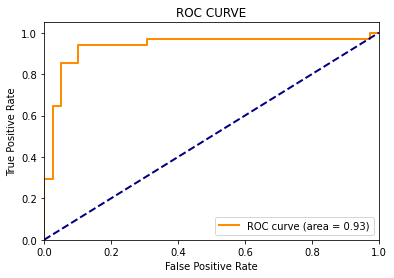

In [ ]:
device='cpu'
actuals, class_probabilities = test_class_probabilities(model_vgg121, device, test_dataset)

fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE' )
plt.legend(loc="lower right")
plt.show()

## **DenseNet 121**

In [ ]:
model_densenet=torchvision.models.densenet121(pretrained=False)
model_densenet.classifier=nn.Sequential(
    nn.Linear(1024,256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128,2),
    nn.LogSoftmax(dim=1)
)
model_densenet.load_state_dict(torch.load('/content/drive/MyDrive/project_covid_small_results/densenet121_2.pth'))

<All keys matched successfully>

In [ ]:
labels,predictions=testset_results(model_densenet,test_dataset,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[32  2]
 [11 28]]
F1 score: 0.811594
Accuracy score: 0.821918
Precision Score: 0.9333333333333333
Recall:0.717948717948718


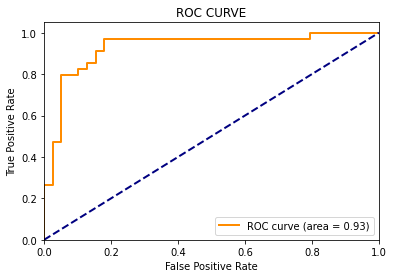

In [ ]:
device='cpu'
actuals, class_probabilities = test_class_probabilities(model_densenet, device, test_dataset)

fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE' )
plt.legend(loc="lower right")
plt.show()

##**Inception Network**

In [ ]:
model_inception=torchvision.models.inception_v3(pretrained=False,aux_logits=False)
model_inception.fc=nn.Sequential(
    nn.Linear(2048,512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512,10),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(10,2),
    nn.LogSoftmax(dim=1)
)
model_inception.load_state_dict(torch.load('/content/drive/MyDrive/project_covid_small_results/inceptionv3_2.pth'))

/usr/local/lib/python3.6/dist-packages/torchvision/models/inception.py:77: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)


<All keys matched successfully>

In [ ]:
device='cuda'

In [ ]:
labels,predictions=testset_results(model_inception,test_dataset_1,device)
print('Confusion matrix:')
print(confusion_matrix(labels, predictions))
print('F1 score: %f' % f1_score(labels, predictions))
print('Accuracy score: %f' % accuracy_score(labels, predictions))
print('Precision Score: {}'.format(precision_score(labels,predictions)))
print('Recall:{}'.format(recall_score(labels,predictions)))

Confusion matrix:
[[32  2]
 [13 26]]
F1 score: 0.776119
Accuracy score: 0.794521
Precision Score: 0.9285714285714286
Recall:0.6666666666666666


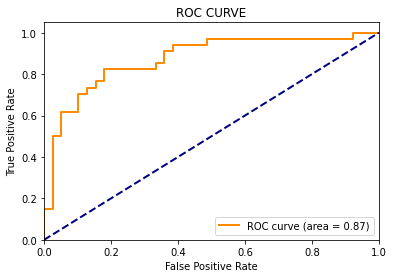

In [ ]:
device='cpu'
actuals, class_probabilities = test_class_probabilities(model_inception, device, test_dataset)

fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE' )
plt.legend(loc="lower right")
plt.show()

##**Final ROC Curve**

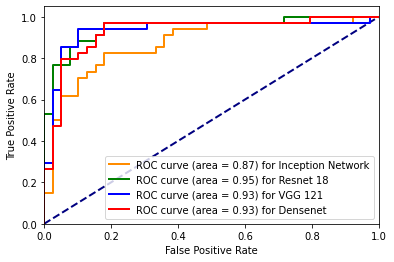

In [ ]:
plt.figure(0).clf()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


actuals, class_probabilities = test_class_probabilities(model_inception, device, test_dataset)
fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f) for Inception Network' % roc_auc)

actuals, class_probabilities = test_class_probabilities(model_resnet18, device, test_dataset)
fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve (area = %0.2f) for Resnet 18' % roc_auc)

actuals, class_probabilities = test_class_probabilities(model_vgg121, device, test_dataset)
fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f) for VGG 121 ' % roc_auc)



actuals, class_probabilities = test_class_probabilities(model_densenet, device, test_dataset)
fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f) for Densenet' % roc_auc)

plt.legend(loc=0)

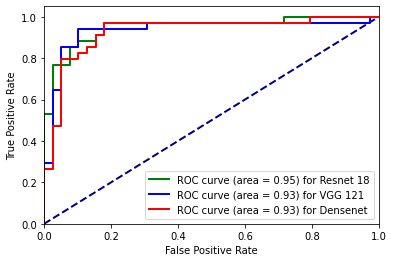

In [ ]:
plt.figure(0).clf()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


actuals, class_probabilities = test_class_probabilities(model_resnet18, device, test_dataset)
fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve (area = %0.2f) for Resnet 18' % roc_auc)

actuals, class_probabilities = test_class_probabilities(model_vgg121, device, test_dataset)
fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f) for VGG 121 ' % roc_auc)



actuals, class_probabilities = test_class_probabilities(model_densenet, device, test_dataset)
fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f) for Densenet' % roc_auc)

plt.legend(loc=0)

#**Plotting Models**

In [ ]:
!sudo apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
!pip3 install graphviz
!pip install hiddenlayer

In [ ]:
import hiddenlayer as hl

### **Resnet 18**

/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to inference mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")
/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to inference mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")


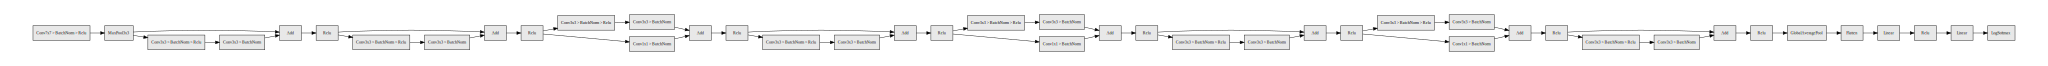

In [ ]:
model = model_resnet18

# Rather than using the default transforms, build custom ones to group
# nodes of residual and bottleneck blocks.
transforms = [
    # Fold Conv, BN, RELU layers into one
    hl.transforms.Fold("Conv > BatchNorm > Relu", "ConvBnRelu"),
    # Fold Conv, BN layers together
    hl.transforms.Fold("Conv > BatchNorm", "ConvBn"),
    # Fold bottleneck blocks
    hl.transforms.Fold("""
        ((ConvBnRelu > ConvBnRelu > ConvBn) | ConvBn) > Add > Relu
        """, "BottleneckBlock", "Bottleneck Block"),
    # Fold residual blocks
    hl.transforms.Fold("""ConvBnRelu > ConvBnRelu > ConvBn > Add > Relu""",
                       "ResBlock", "Residual Block"),
    # Fold repeated blocks
    hl.transforms.FoldDuplicates(),
]

# Display graph using the transforms above
hl.build_graph(model, torch.zeros([1, 3, 224, 224]), transforms=transforms)

/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to inference mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")
/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to inference mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")


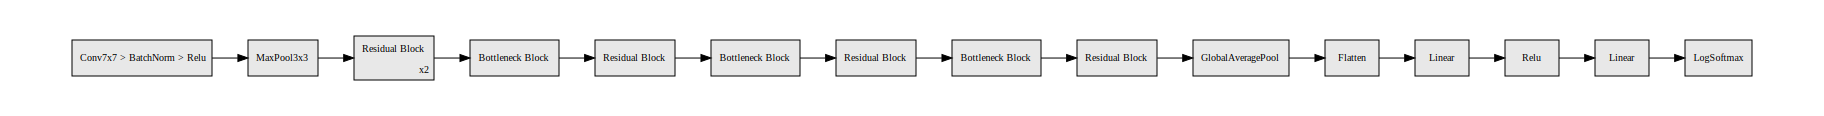

In [ ]:
transforms = [
    # Fold Conv, BN, RELU layers into one
    hl.transforms.Fold("Conv > BatchNorm > Relu", "ConvBnRelu"),
    # Fold Conv, BN layers together
    hl.transforms.Fold("Conv > BatchNorm", "ConvBn"),
  ##  hl.transforms.Fold("Conv > BatchNorm > Relu> Conv> BatchNorm", "ConvBnReluConvBn"),
    # Fold bottleneck blocks
    hl.transforms.Fold("""
        ((ConvBnRelu > ConvBn) | ConvBn) > Add > Relu
        """, "BottleneckBlock", "Bottleneck Block"),
    # Fold residual blocks
    hl.transforms.Fold("""ConvBnRelu > ConvBn > Add > Relu""",
                       "ResBlock", "Residual Block"),
    # Fold repeated blocks
    hl.transforms.FoldDuplicates(),
]

# Display graph using the transforms above
hl.build_graph(model, torch.zeros([1, 3, 224, 224]), transforms=transforms)

## **VGG 121**

/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to inference mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")


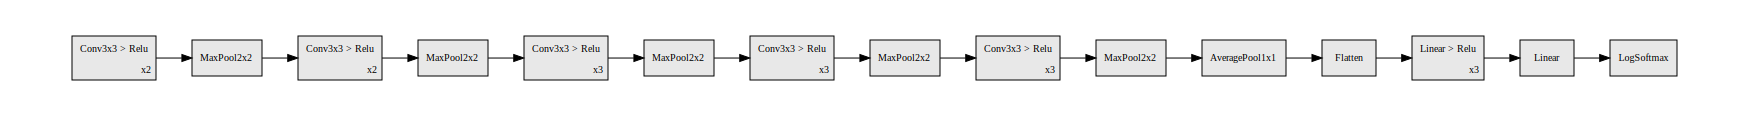

In [ ]:
model = model_vgg121
hl.build_graph(model, torch.zeros([1, 3, 224, 224]))

## **Densenet121**

/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to inference mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")
/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to inference mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")


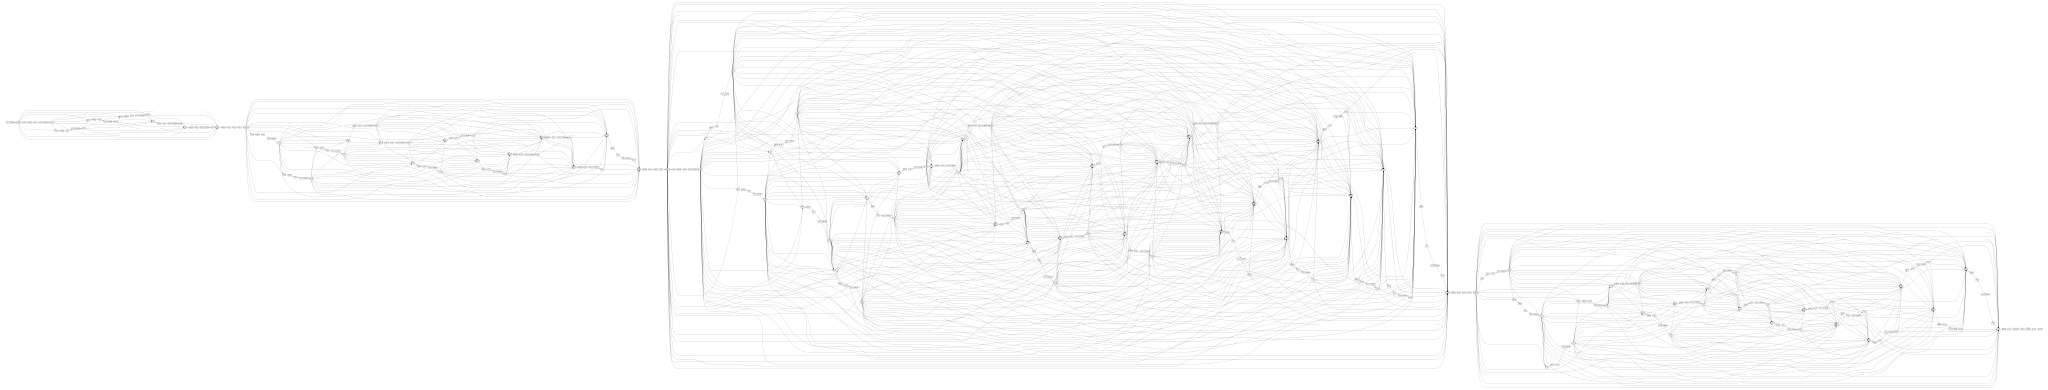

In [ ]:
model = model_densenet
hl.build_graph(model, torch.zeros([1, 3, 224, 224]))

## **Inception Network**

/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to inference mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")
/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to inference mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")


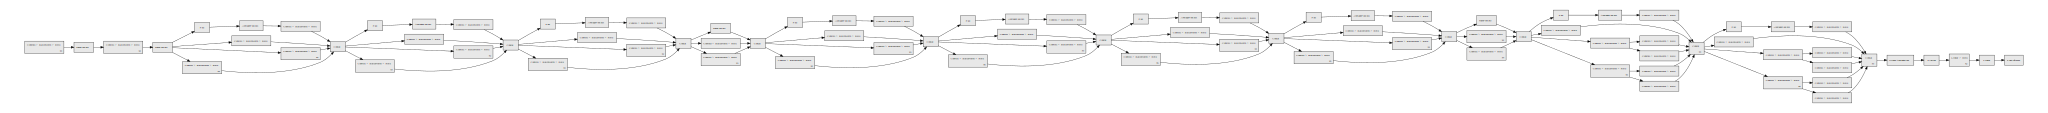

In [ ]:
model=model_inception
hl.build_graph(model, torch.zeros([1, 3, 224, 224]))